In [74]:
import os
import cv2
import numpy as np
from PIL import Image

from torchvision.datasets import ImageFolder


class ImageDataset(ImageFolder):

    def __init__(self, root, transform=None, target_transform=None):
        super().__init__(root, transform, target_transform)

    def __len__(self):
        pass

    def __getitem__(self, item):
        return super().__getitem__(item)

    def save_processed_images(self, path):
        for idx, img in enumerate(self.imgs):
            cv2.imwrite(os.path.join(path, str(idx) + ".jpg"), img)

In [75]:
class RandomTransform(object):

    def __init__(self, rotation_range=10, zoom_range=0.05, shift_range=0.05, hue_range=7, saturation_range=0.2,
                 brightness_range=80, flip_probability=0.5):
        """
        :param rotation_range: Range within the image gets rotated randomly
        :param zoom_range: Range within the image gets zoomed randomly
        :param shift_range: Range within the image gets shifted randomly
        :param hue_range: Range within the image's hue gets shifted randomly
        :param saturation_range: Range within the image's saturation gets shifted randomly
        :param brightness_range: Range within the image's brightness gets shifted randomly
        :param flip_probability: Probability of a random flip of the image
        """
        self.rotation_range = rotation_range
        self.zoom_range = zoom_range
        self.shift_range = shift_range
        self.hue_range = hue_range
        self.saturation_range = saturation_range
        self.brightness_range = brightness_range
        self.flip_probability = flip_probability

    def __call__(self, image):
        rotation = np.random.uniform(-self.rotation_range, self.rotation_range)
        scale = np.random.uniform(1 - self.zoom_range, 1 + self.zoom_range)
        x_shift = np.random.uniform(-self.shift_range, self.shift_range) * 256
        y_shift = np.random.uniform(-self.shift_range, self.shift_range) * 256

        trans = cv2.getRotationMatrix2D((256 // 2, 256 // 2), rotation, scale)
        trans[:, 2] += (x_shift, y_shift)
        image = cv2.warpAffine(image, trans, (256, 256), borderMode=cv2.BORDER_REPLICATE)

        if np.random.random() < self.flip_probability:
                image = image[:, ::-1]

        h, s, v = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))

        h += np.random.uniform(-self.hue_range, self.hue_range)
        s += np.random.uniform(-self.saturation_range, self.saturation_range)
        v += np.random.uniform(-self.brightness_range, self.brightness_range)

        return cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)


In [113]:
d = ImageDataset("./img")

In [114]:
img = d.__getitem__(0)

In [115]:
trans = RandomTransform()

In [116]:
img2 = trans(np.asarray(img[0]).astype(np.float32))

In [117]:
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
cv2.imwrite('test.jpg', img2)

True

In [118]:
pil_im = Image.fromarray(img2.astype(np.uint8))

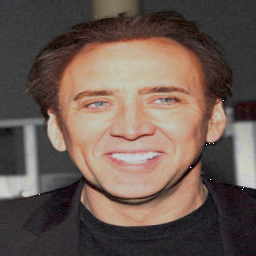

In [119]:
pil_im